In [147]:
import numpy as np

# Problem statement
def f(t,Y):
    x,y,z = Y
    return np.array([-y, x, -100*(z - x**2 - y**2)])
    
def Df(t,Y):
    x,y,z = Y
    return np.matrix([[0, -1, 0],
                      [1, 0, 0],
                      [200*x, 200*y, -100]])

### Function to find root of for trapezoid method
def g(Y, Yj, tj, h):
    return Y - Yj - h/2*f(tj,Yj) - h/2*f(tj+h,Y)

def Dg(Y, Yj, tj, h):
    return np.eye(3) - h/2*Df(tj+h,Y)
        

# Problem parameters
Y0 = np.array([3, 0, 18])
h = 0.05
t = np.arange(0.2, 5, step=h)


# Trapezoid method
Y = np.empty([len(t), 3])
Y[0,:] = Y0

for j, tj in enumerate(t[0:-1]):
    Yj = Y[j,:]

    # Newton solve
    Yjp1 = Yj
    niters = 3
    for i in range(niters):
        gi = g(Yjp1, Yj, tj, h)
        Dgi = Dg(Yjp1, Yj, tj, h)
        s = np.linalg.solve( Dgi, gi)
        Yjp1 = Yjp1 - s
        
    Y[j+1,:] = Yjp1
    
    
# Euler's method
Z = np.empty([len(t),3])
Z[0,:] = Y0

for j, tj in enumerate(t[0:-1]):
    Z[j+1,:] = Z[j] + h*f(tj,Z[j])

In [141]:
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'  
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline  
sns.set()

Text(0, 0.5, 'Y')

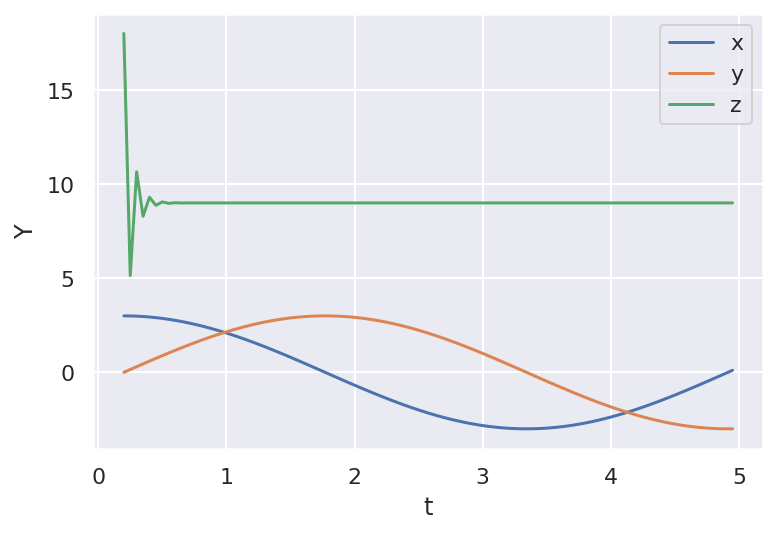

In [142]:
# Plots
plt.plot(t,Y[:,0],t,Y[:,1],t,Y[:,2])
plt.legend(['x', 'y', 'z'])
plt.xlabel('t')
plt.ylabel('Y')
#plt.plot(t,Z[:,0],t,Z[:,1],t,Z[:,2])
#plt.plot(t,Z[:,0],t,Y[:,0])

Text(0, 0.5, 'Y')

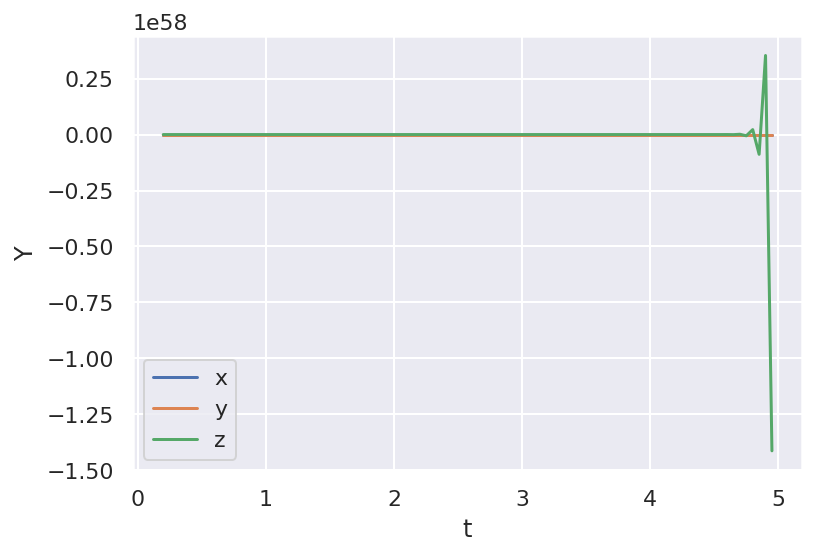

In [143]:
plt.plot(t,Z[:,0],t,Z[:,1],t,Z[:,2])
plt.legend(['x', 'y', 'z'])
plt.xlabel('t')
plt.ylabel('Y')

Text(0, 0.5, 'x')

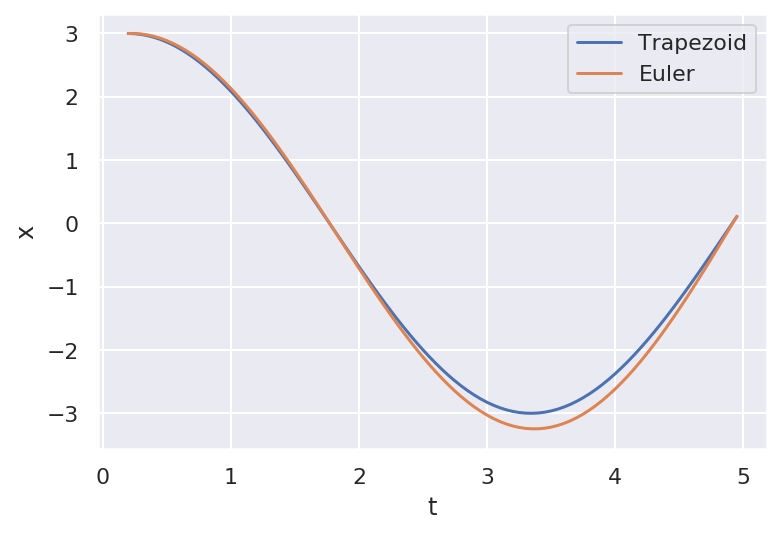

In [144]:
plt.plot(t,Y[:,0],t,Z[:,0])
plt.legend(['Trapezoid', 'Euler'])
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'y')

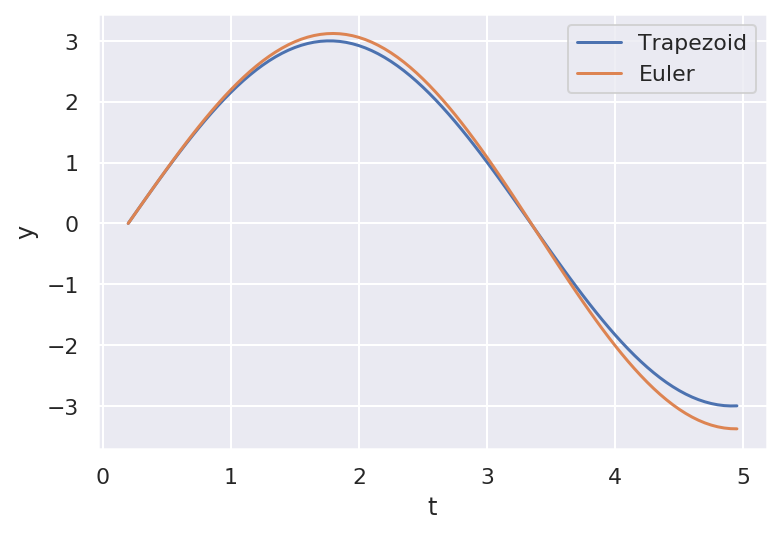

In [145]:
plt.plot(t,Y[:,1],t,Z[:,1])
plt.legend(['Trapezoid', 'Euler'])
plt.xlabel('t')
plt.ylabel('y')

Text(0, 0.5, 'z')

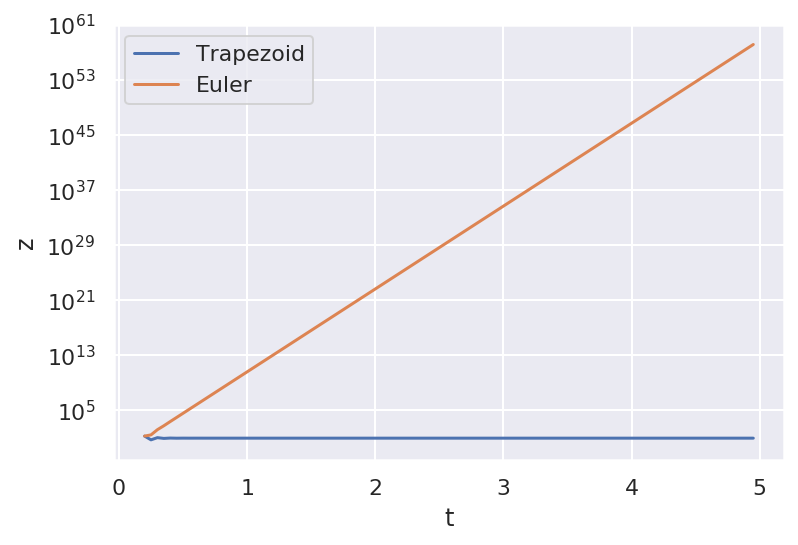

In [146]:
plt.semilogy(t,Y[:,2],t,abs(Z[:,2]))
plt.legend(['Trapezoid', 'Euler'])
plt.xlabel('t')
plt.ylabel('z')